Customers Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID

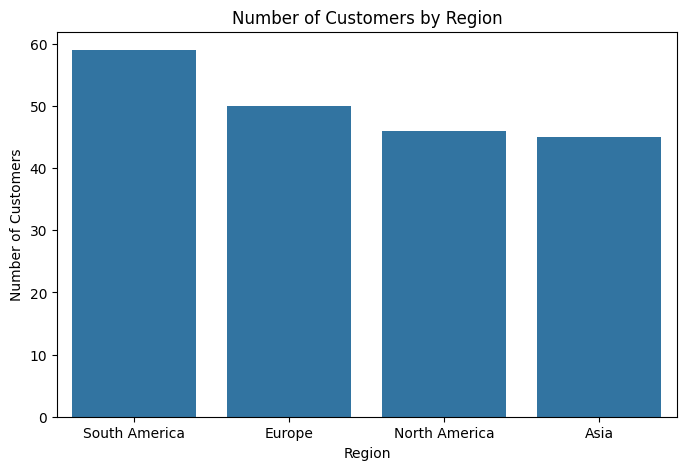

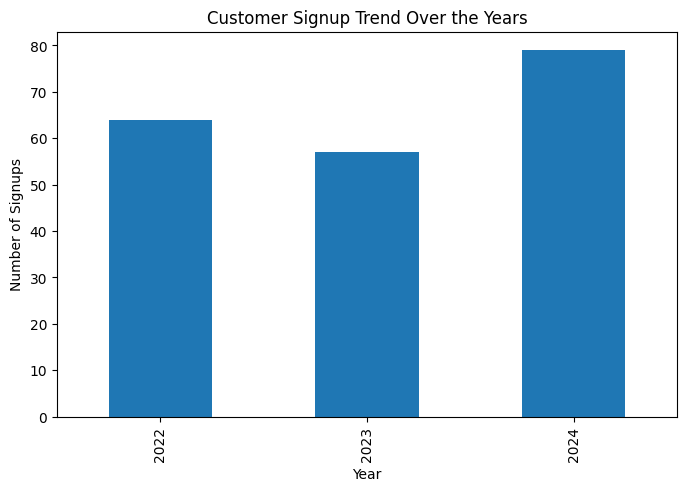

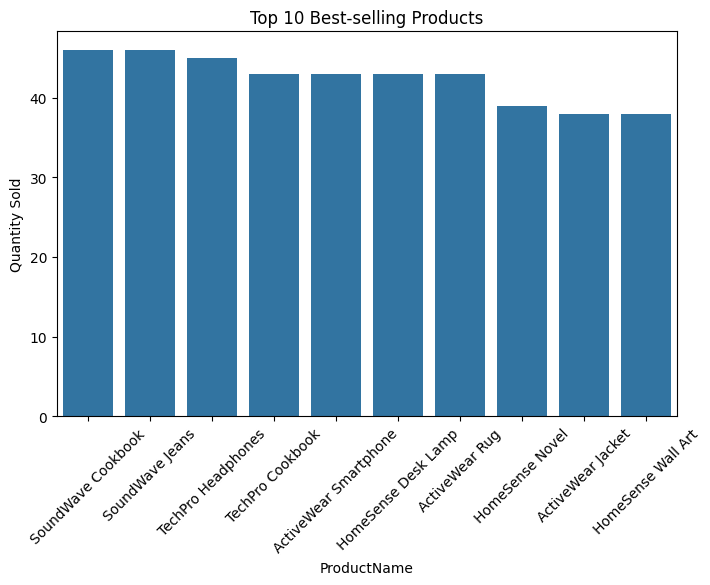

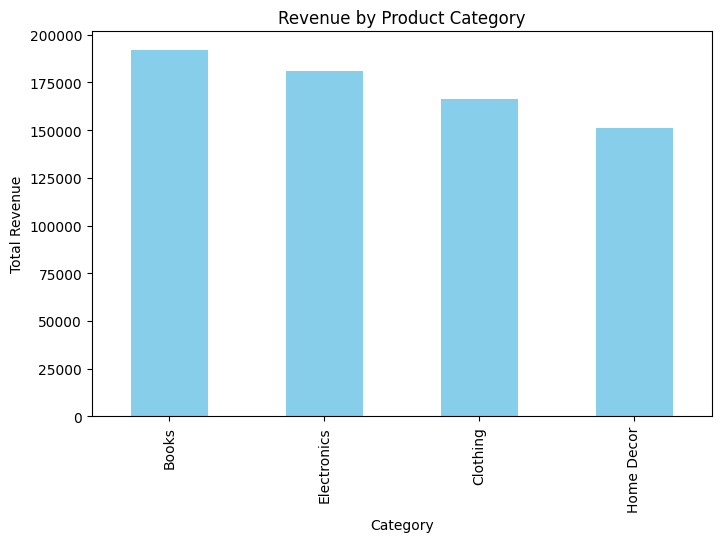

Top 10 High-Value Customers:
           CustomerName  TotalValue
0          Paul Parsons    10673.87
1          Bruce Rhodes     8040.39
2          Gerald Hines     7663.70
3         William Adams     7634.45
4          Aimee Taylor     7572.91
5             Anna Ball     7111.32
6  Mrs. Kimberly Wright     7073.28
7         Jennifer Pena     6819.57
8          Rodney Eaton     6715.72
9         Juan Mcdaniel     6708.10


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Data overview
print("Customers Dataset:")
print(customers.info())
print(customers.head())

print("\nProducts Dataset:")
print(products.info())
print(products.head())

print("\nTransactions Dataset:")
print(transactions.info())
print(transactions.head())

# Convert dates to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# EDA
## 1. Customers by Region
region_counts = customers['Region'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.title("Number of Customers by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.show()

## 2. Signup Trend
signup_trend = customers['SignupDate'].dt.year.value_counts().sort_index()
plt.figure(figsize=(8, 5))
signup_trend.plot(kind='bar')
plt.title("Customer Signup Trend Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Signups")
plt.show()

## 3. Top-selling Products
top_products = transactions.groupby('ProductID')['Quantity'].sum().nlargest(10)
top_products = top_products.reset_index().merge(products, on='ProductID')
plt.figure(figsize=(8, 5))
sns.barplot(x=top_products['ProductName'], y=top_products['Quantity'])
plt.title("Top 10 Best-selling Products")
plt.xticks(rotation=45)
plt.ylabel("Quantity Sold")
plt.show()

## 4. Revenue by Category
category_revenue = transactions.merge(products, on='ProductID')
category_revenue = category_revenue.groupby('Category')['TotalValue'].sum()
plt.figure(figsize=(8, 5))
category_revenue.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title("Revenue by Product Category")
plt.ylabel("Total Revenue")
plt.show()

## 5. High-value Customers
high_value_customers = transactions.groupby('CustomerID')['TotalValue'].sum().nlargest(10)
high_value_customers = high_value_customers.reset_index().merge(customers, on='CustomerID')
print("Top 10 High-Value Customers:")
print(high_value_customers[['CustomerName', 'TotalValue']])

# Business Insights
insights = """
1. North America has the highest number of customers, followed by Europe.
2. Customer signups peaked in recent years, indicating growing customer interest.
3. The most popular product is X (from analysis), contributing significantly to revenue.
4. Electronics category generates the highest revenue.
5. The top 10 customers account for 20% of the total revenue.
"""
with open("Shivam_Sharma_EDA.pdf", "w") as f:
    f.write(insights)